# **Problem Statement :**
This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.

# **Step 1 : Import Libraries**

In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2 : Import Dataset**

In [85]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [86]:
stock.head(5)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [87]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [88]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# **Step 3 : Visualize dataset**

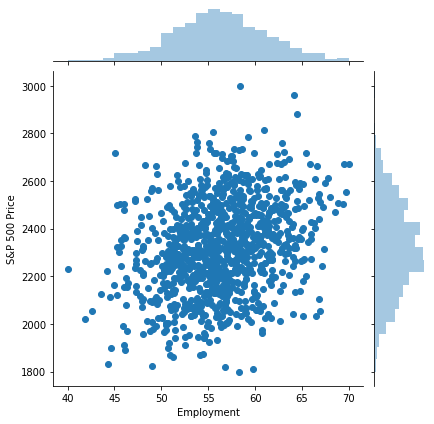

In [89]:
sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = stock)

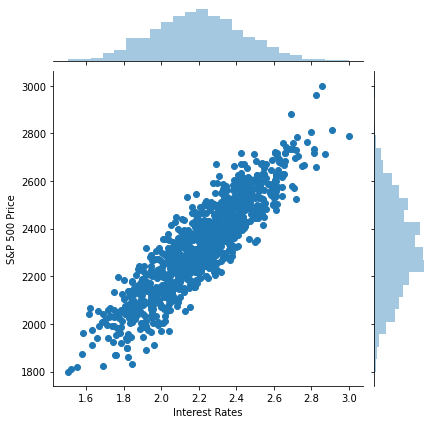

In [90]:
sns.jointplot( x = 'Interest Rates', y = 'S&P 500 Price', data = stock)

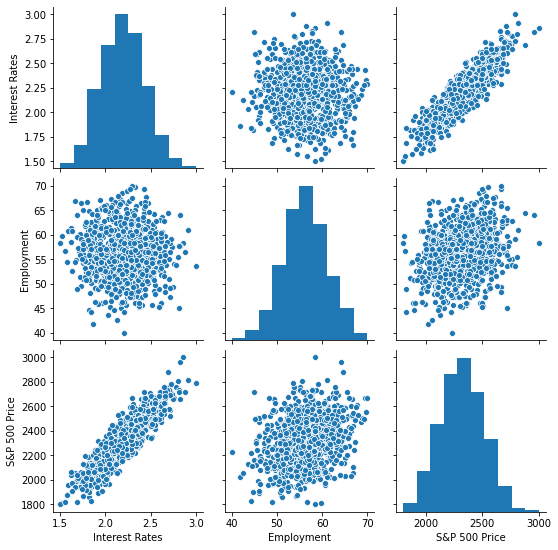

In [91]:
sns.pairplot(stock)

# **Step 4 : Split into Training and Test dataset**

In [92]:
y = stock ['S&P 500 Price']

In [93]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [94]:
X = stock[['Interest Rates', 'Employment']]

In [95]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [97]:
X_train

,Interest Rates,Employment
746,1.746800,58.477594
623,2.389348,56.175441
612,1.789672,59.957950
806,2.461079,56.876450
282,2.748589,49.382487
...,...,...
919,2.717694,47.210451
948,2.416879,61.198672
207,2.155369,48.067082
575,2.370564,53.165958


In [98]:
X_test

,Interest Rates,Employment
70,2.043083,53.482382
896,2.596025,45.229757
47,1.821981,64.827147
484,2.219613,55.246149
580,1.913746,56.475160
...,...,...
256,2.046986,57.199887
970,2.289291,60.032993
153,2.512355,56.317313
873,1.808658,52.250268


# **Step 5 : Train the model**

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
regressor = LinearRegression(fit_intercept = True) # True will not force the line to pass from origin

In [101]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [727.37339523  12.52350508]
Linear Model Coefficients (b) 15.612651715174707


# **Step 6 : Test the model**

In [103]:
y_predict = regressor.predict(X_test)
y_predict

array([2171.483633  , 2470.32743087, 2152.73640424, 2321.97570076,
       2114.88780027, 2871.59629553, 2112.40639625, 2640.66496676,
       2514.77772615, 2429.52614089, 2171.94010782, 2025.03604627,
       2320.39864699, 2354.18535064, 2341.59049836, 2070.39420616,
       2270.5659191 , 2392.95942006, 2247.20959359, 2303.20667153,
       2513.5030029 , 2035.62635165, 2350.92350943, 2310.48410914,
       2321.95292972, 2262.55225316, 1858.26303836, 2699.78785142,
       2598.21568805, 2024.32298455, 2493.7838687 , 2482.15586142,
       2419.90571058, 1917.43502908, 2381.44253506, 2376.2157375 ,
       2386.98283612, 2328.18525679, 2345.09173197, 2628.31477407,
       2165.07233655, 2362.65069678, 2502.38362649, 2278.65132749,
       2371.38711179, 2299.80307556, 2530.82378476, 2266.19020473,
       2184.80013837, 2434.44253078, 2420.13892777, 2393.10229732,
       2499.51214647, 2896.0506817 , 2551.59073509, 2551.2839472 ,
       2068.96336942, 2002.31343696, 2476.33642205, 2334.51182

In [104]:
y_test

70     2180.527688
896    2501.037865
47     2136.421802
484    2372.028186
580    2034.833667
          ...     
256    2130.351600
970    2355.225478
153    2569.794605
873    2039.919628
885    2240.801435
Name: S&P 500 Price, Length: 300, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

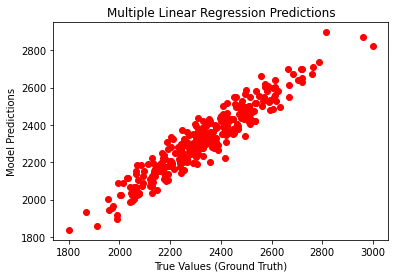

In [105]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

# **Step 7 : Evaluate the model**

In [106]:
k = X_test.shape[1]
n = len(X_test)

In [107]:
n

300

In [108]:
k

2

In [109]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test-y_predict) / y_test))*100

In [110]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  59.824 
MSE = 3578.876266840676 
MAE = 48.19075692171668 
R2 = 0.902565056057824 
Adjusted R2 = 0.9019089284891898 
MAPE = 2.0647748489836983


# **Step 8 - Visualize Test set results**

In [111]:
from mpl_toolkits.mplot3d import Axes3D

In [112]:
x_surf, y_surf = np.meshgrid( np.linspace( stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),  np.linspace(stock['Employment'].min(), stock['Employment'].max() , 100))

In [113]:
x_surf.shape

(100, 100)

In [114]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()}) 

In [115]:
onlyX.shape

(10000, 2)

In [116]:
fittedY = regressor.predict(onlyX)

In [117]:
fittedY.shape

(10000,)

In [118]:
fittedY = fittedY.reshape(x_surf.shape)

In [119]:
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock index price')

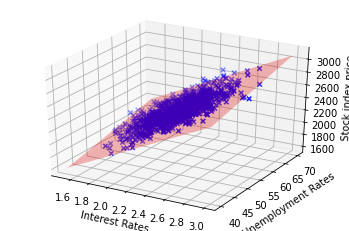

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'] , stock['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

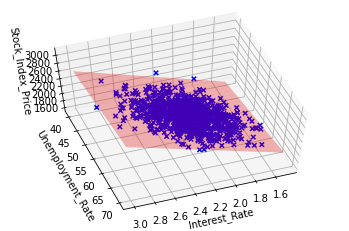

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()

In [122]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,727.373395
Employment,12.523505
